<a href="https://colab.research.google.com/github/midhun3389/120-Data-Science-Interview-Questions/blob/master/image%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from matplotlib import pyplot as plt

In [0]:
from google.colab import files
uploaded = files.upload()

Saving catdogedit.zip to catdogedit.zip


In [0]:
!unzip "/content/catdogedit.zip"

Archive:  /content/catdogedit.zip
   creating: test_set/
  inflating: test_set/.DS_Store      
   creating: test_set/cats/
  inflating: test_set/cats/.DS_Store  
  inflating: test_set/cats/cat.4001.jpg  
  inflating: test_set/cats/cat.4002.jpg  
  inflating: test_set/cats/cat.4003.jpg  
  inflating: test_set/cats/cat.4004.jpg  
  inflating: test_set/cats/cat.4005.jpg  
  inflating: test_set/cats/cat.4006.jpg  
  inflating: test_set/cats/cat.4007.jpg  
  inflating: test_set/cats/cat.4008.jpg  
  inflating: test_set/cats/cat.4009.jpg  
  inflating: test_set/cats/cat.4010.jpg  
  inflating: test_set/cats/cat.4011.jpg  
  inflating: test_set/cats/cat.4012.jpg  
  inflating: test_set/cats/cat.4013.jpg  
  inflating: test_set/cats/cat.4014.jpg  
  inflating: test_set/cats/cat.4015.jpg  
  inflating: test_set/cats/cat.4016.jpg  
  inflating: test_set/cats/cat.4017.jpg  
  inflating: test_set/cats/cat.4018.jpg  
  inflating: test_set/cats/cat.4019.jpg  
  inflating: test_set/cats/cat.4020.jpg 

<class 'PIL.Image.Image'>
<class 'numpy.ndarray'>
(224, 224, 3)


<function print>

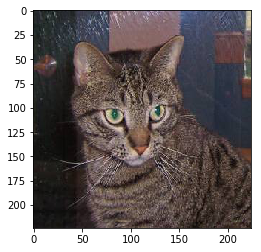

In [0]:
img = image.load_img("/content/training_set/cats/cat.1.jpg",target_size=( 224,224))
print(type(img))

x = image.img_to_array(img)
print(type(x))
print(x.shape)
plt.imshow(x/255)
print

In [0]:
from google.colab import files
uploaded = files.upload()

Saving 2 way splitter.JPG to 2 way splitter.JPG
Saving 2.JPG to 2.JPG
Saving 4.JPG to 4.JPG
Saving Capture.JPG to Capture.JPG
Saving Capture2.JPG to Capture2.JPG
Saving Capture4.JPG to Capture4.JPG


<class 'PIL.Image.Image'>
<class 'numpy.ndarray'>
(224, 224, 3)


<function print>

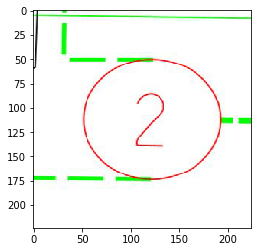

In [0]:
img = image.load_img("Capture4.JPG",target_size=( 224,224))
print(type(img))

x = image.img_to_array(img)
print(type(x))
print(x.shape)
plt.imshow(x/255)
print

In [0]:
from google.colab import files
uploaded = files.upload()

Saving image classification.zip to image classification.zip


In [0]:
from google.colab import files
uploaded = files.upload()

Saving image classification.zip to image classification (1).zip


In [0]:
!unzip "/content/image classification (1).zip"

Archive:  /content/image classification (1).zip
   creating: test/
   creating: test/2 way splitter/
  inflating: test/2 way splitter/1.JPG  
  inflating: test/2 way splitter/2.JPG  
   creating: test/amp/
  inflating: test/amp/2.JPG          
  inflating: test/amp/Capture.JPG    
   creating: train/
   creating: train/2 way splitter/
  inflating: train/2 way splitter/2 way splitter.JPG  
  inflating: train/2 way splitter/2.JPG  
  inflating: train/2 way splitter/4.JPG  
  inflating: train/2 way splitter/Capture.JPG  
  inflating: train/2 way splitter/Capture2.JPG  
  inflating: train/2 way splitter/Capture4.JPG  
   creating: train/amp/
  inflating: train/amp/2.JPG         
  inflating: train/amp/Capture7.JPG  


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [0]:
classifier = Sequential()


In [0]:
classifier.add(Conv2D(32,(3,3), input_shape = (64,64,3), activation = "relu"))

In [0]:
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [0]:
classifier.add(Flatten())

In [0]:
classifier.add(Dense(output_dim = 128, activation = "relu"))
classifier.add(Dense(output_dim = 1, activation = "sigmoid"))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  


In [0]:
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [0]:
train_datagen = ImageDataGenerator( rescale = 1./255,shear_range = 0.2,
                                  zoom_range=0.2, horizontal_flip = True)
training_set = train_datagen.flow_from_directory("/content/training_set",target_size=(64,64),batch_size=32,
                                                class_mode = "binary")

Found 1000 images belonging to 2 classes.


In [0]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory("/content/test_set",target_size=(64,64),batch_size=32,
                                           class_mode = "binary")

Found 264 images belonging to 2 classes.


In [0]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               3936384   
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 129       
Total params: 3,937,409
Trainable params: 3,937,409
Non-trainable params: 0
_________________________________________________________________


In [0]:
classifier.fit_generator(training_set,steps_per_epoch=602,epochs=10,validation_data = test_set,validation_steps=800)

Epoch 1/10
602/602 [==============================] - 144s 239ms/step - loss: 0.5650 - acc: 0.7159 - val_loss: 0.5851 - val_acc: 0.7576
Epoch 2/10
602/602 [==============================] - 137s 228ms/step - loss: 0.3610 - acc: 0.8452 - val_loss: 0.6297 - val_acc: 0.7499
Epoch 3/10
602/602 [==============================] - 135s 225ms/step - loss: 0.2439 - acc: 0.9005 - val_loss: 1.0204 - val_acc: 0.6858
Epoch 4/10
602/602 [==============================] - 134s 223ms/step - loss: 0.1622 - acc: 0.9391 - val_loss: 0.9170 - val_acc: 0.7236
Epoch 5/10
602/602 [==============================] - 134s 223ms/step - loss: 0.1129 - acc: 0.9609 - val_loss: 0.9368 - val_acc: 0.7386
Epoch 6/10
602/602 [==============================] - 134s 222ms/step - loss: 0.0728 - acc: 0.9763 - val_loss: 1.1436 - val_acc: 0.7423
Epoch 7/10
602/602 [==============================] - 136s 226ms/step - loss: 0.0568 - acc: 0.9828 - val_loss: 1.0998 - val_acc: 0.7309
Epoch 8/10
602/602 [============================

In [0]:
upload = files.upload()

Saving dog.4029.jpg to dog.4029.jpg
Saving dog.4133.jpg to dog.4133.jpg


In [0]:
upload = files.upload()

Saving cat.4134.jpg to cat.4134.jpg
Saving cat.4135.jpg to cat.4135.jpg


In [0]:
import numpy as np

In [0]:
from keras.preprocessing import image
test = image.load_img("/content/dog.4133.jpg",target_size = (64,64))
test = image.img_to_array(test)
test = np.expand_dims(test,axis=0)
result = classifier.predict(test)
training_set.class_indices
if result[0][0] >= 0.5:
  prediction = "dog"
else:
  prediction = "cat"
print(prediction)
print(result)

dog
[[1.]]


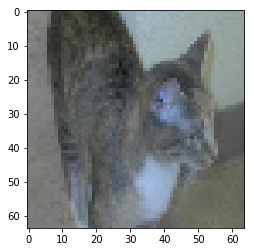

In [0]:
test = image.load_img("/content/cat.4134.jpg",target_size = (64,64))
test = image.img_to_array(test)
plt.imshow(test/255)